# Plotting MSLP

This notebook will demonstrate how to plot MSLP data from the GFS model using the basic matplotlib library. The data is coming from GFS 0.25 model, later on we will try to use FIJI NWP model data.
For GFS 0.25 we will download the subset from this website:
https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl

The data is in GRIB2 format, so we will use the xarray library to read the data and plot it using matplotlib.
First we need to import required libraries.

## Part 1: Reading GFS data using Xarray

In [11]:
import xarray as xr

Use Xarray module to read the data

In [2]:
ds = xr.open_dataset('data/gfs.t00z.pgrb2.0p25.f003', engine='cfgrib')
ds

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-06-19T13:30 GRIB to CDM+CF via cfgrib-0.9.1...

From the data above we see that the data have several coordinates and index.
Since we only use one time and step so we don't need to select the time and step.
The variables is the data we need, we will use it to make the plot. Let's see the prmsl variable and make direct plot using xarray plot method.

In [4]:
ds['prmsl']

<xarray.DataArray 'prmsl' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260074
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Pressure reduced to MSL
    GRIB_shortName:                           prmsl
    GRIB_units:                               Pa
    long_name:                                Pressure reduced to MSL
    units:                                    Pa
    standard_name:                            unknown

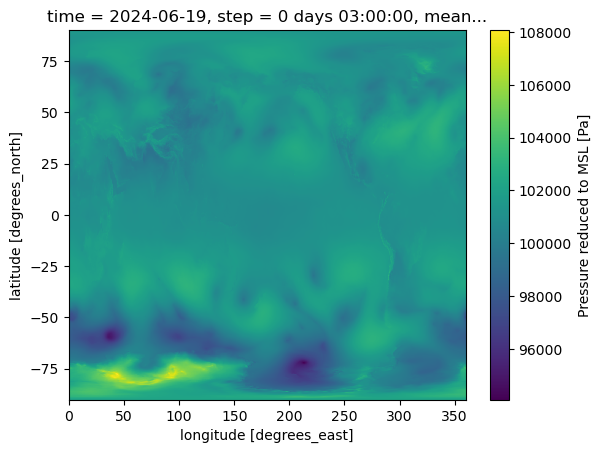

In [5]:
ds['prmsl'].plot()

Question:
1. What is the variable name and unit of the data?
2. What is the domain of the data?
3. What is the time and step of the data?

See that the data cover global area, we will subset the data to only cover pacific area. See also that the units in Pa, we will convert it to hPa.

In [15]:
longitude = slice(165,205)
latitude = slice(-5,-35)
prmsl = ds['prmsl']/100

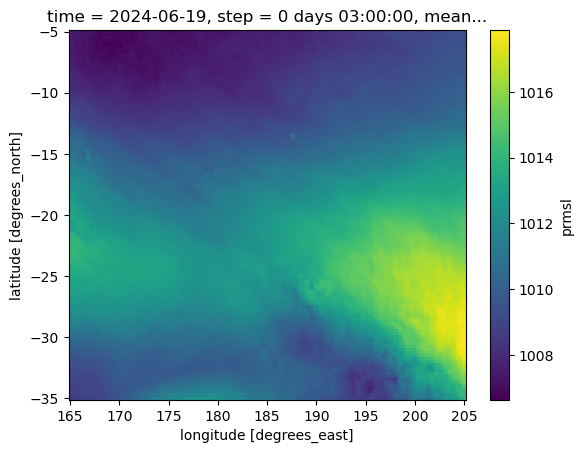

In [16]:
prmsl.sel(longitude=longitude, latitude=latitude).plot()

Now the domain looks better.
Since Xarray plot method is quite limited to make plots based on our need, we will use matplotlib to make the plot.
We will use "prmsl" variable since we have subset the data.

## Part 2: Plotting MSLP using Matplotlib

Let's import matplotlib and cartopy library.

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Extract the required variables from the "prmsl" data, we need the longitude, latitude, and the data itself.

In [24]:
# Extract the required variables from 'prmsl'
prmsl = prmsl.sel(longitude=longitude, latitude=latitude)
lons = prmsl.longitude
lats = prmsl.latitude

Text(0, 0.5, 'Latitude')

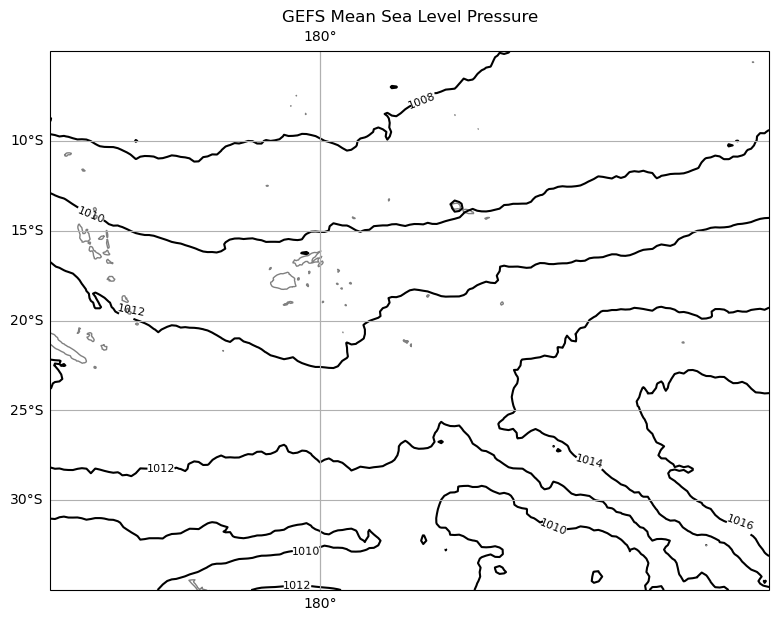

In [28]:
# Initiate figure and axes instance
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=185)})

# Plot the data as contour
# levels = [990, 1000, 1002,1004, 1006, 1010,1012,1014,1016,1018,1020,1024,1028] # Define the levels here or use range 
levels = range(990,1028,2)
contour = ax.contour(lons, lats, prmsl, transform=ccrs.PlateCarree(), colors='black', levels=levels)

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
ax.set_title('GEFS Mean Sea Level Pressure')

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlabel('Longitude',fontsize=5)
ax.set_ylabel('Latitude',fontsize=5)

# Save the image
# plt.savefig("test_result.png")

At this step, we have made a basic contour plot using matplotlib and cartopy library. Next we can customize our plot to add more information.

## Part 3: Customizing the plot

### Smoothing the contour plot using scipy library

In [29]:
from scipy.ndimage import gaussian_filter

In [30]:
smoothed_prmsl = gaussian_filter(prmsl, sigma=2)

The gaussian_filter is applied to the prmsl_domain data with a specified sigma value, which controls the amount of smoothing. You can adjust sigma to get the desired level of smoothness.

### Exercise
1. Using the previous code to plot, try to plot the smoothed_prmsl data.
2. Play with the sigma value and see the result

Text(0, 0.5, 'Latitude')

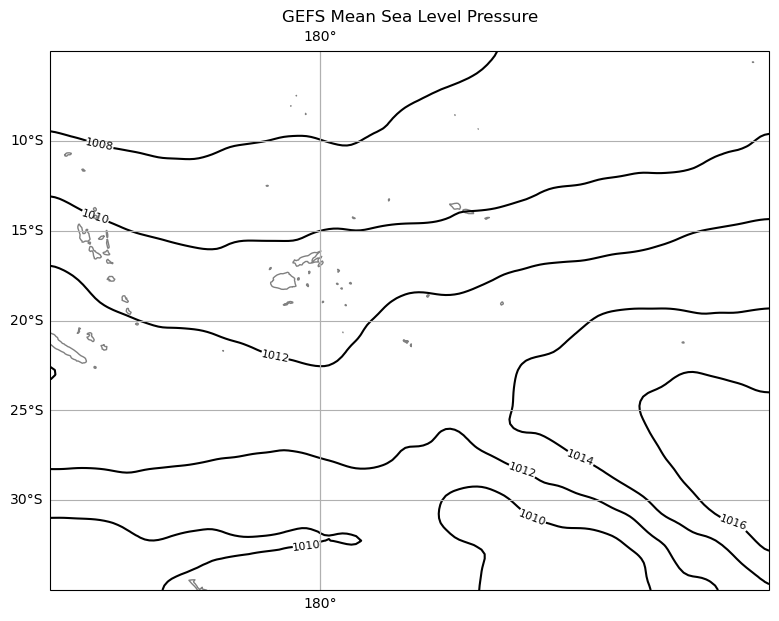